## ***DL EXP 6 - Design the Architecture & Implement the Autoencoder Model for Image Compression.***

PAREENITA A.SHIRSATH   ROLL.NO : 57   B.E.A.I.&.D.S.

DL EXPERIMENT NO : 06

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 0.0589
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step - loss: 0.0467
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step - loss: 0.0397
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 0.0369
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - loss: 0.0376
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.0367
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step - loss: 0.0343
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - loss: 0.0325
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step - loss: 0.0320
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - loss: 0.0311
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.0291
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - loss: 0.0275
Epoch 13/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - loss: 0.0258
Epoch 14/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.0233
Epoch 15/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss:

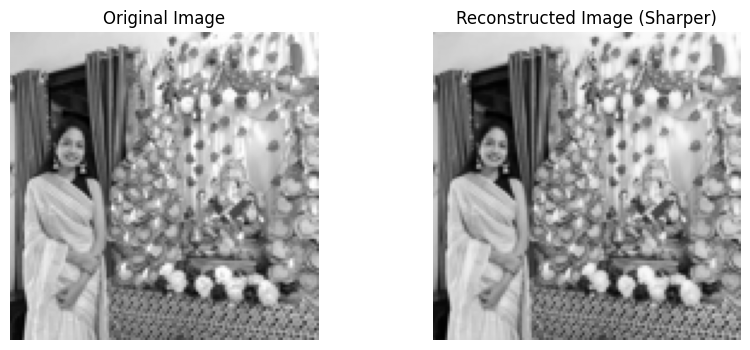

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate
from tensorflow.keras.optimizers import Adam
from PIL import Image

# Load and preprocess image
image_path = '/content/Paree.jpg'
img = Image.open(image_path)
img = img.resize((128, 128))
img = img.convert('L')
img_array = np.asarray(img) / 255.0
img_array = np.reshape(img_array, (1, 128, 128, 1))

# Input
input_img = Input(shape=(128, 128, 1))

# Encoder
c1 = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
p1 = MaxPooling2D((2, 2), padding='same')(c1)

c2 = Conv2D(32, (3, 3), activation='relu', padding='same')(p1)
p2 = MaxPooling2D((2, 2), padding='same')(c2)

c3 = Conv2D(16, (3, 3), activation='relu', padding='same')(p2)
encoded = MaxPooling2D((2, 2), padding='same')(c3)

# Decoder with skip connections
u1 = UpSampling2D((2, 2))(encoded)
m1 = concatenate([u1, c3])
d1 = Conv2D(16, (3, 3), activation='relu', padding='same')(m1)

u2 = UpSampling2D((2, 2))(d1)
m2 = concatenate([u2, c2])
d2 = Conv2D(32, (3, 3), activation='relu', padding='same')(m2)

u3 = UpSampling2D((2, 2))(d2)
m3 = concatenate([u3, c1])
d3 = Conv2D(64, (3, 3), activation='relu', padding='same')(m3)

# Output
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d3)

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train longer
autoencoder.fit(img_array, img_array,
                epochs=1000,  # 🔹 more epochs = sharper details
                batch_size=1,
                shuffle=True,
                verbose=1)

# Reconstruct
decoded_img = autoencoder.predict(img_array)
decoded_img = decoded_img.reshape(128, 128)

# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_array.reshape(128, 128), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(decoded_img, cmap='gray')
plt.title("Reconstructed Image (Sharper)")
plt.axis('off')
plt.show()
